<a href="https://colab.research.google.com/github/grumbeard/cv-fumoffu/blob/main/Fumoffu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Puzzle Constructor

In [1]:
# Import required libraries
import os
import cv2
import matplotlib.pyplot as plt
import shutil
import math

from google.colab import files

## Import Data

In [2]:
# Upload images (.zip file)
uploaded = files.upload()

Saving fumo.zip to fumo.zip


## Unzip Data 

In [3]:
# Get file name
filenames = uploaded.keys()

# Unzip all files uploaded
for filename in filenames:
    filepath = "/content/" + filename
    !unzip -qq -u "{filepath}" -d "/content/images"
    # Remove zip file
    ! rm -r "{filename}"


## Extract Data from Uploaded Images

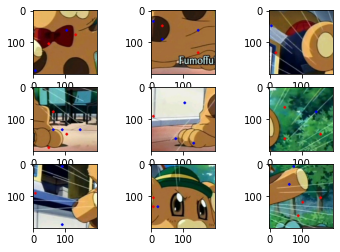

In [4]:
def interpret_images_from_folder(folder_path):
  remove_unwanted_dir(folder_path, '__MACOSX')

  images = extract_images(folder_path)

  # Review extracted images
  side_count = math.sqrt(len(images))
  for i in range(len(images)):
      plt.subplot(side_count, side_count, i+1)
      plt.imshow(images[i])

  return images

def remove_unwanted_dir(folder_path, dir_name):
  for (root,dirs,files) in os.walk(folder_path, topdown=True):
    # Get rid of auto-generated files
    if '__MACOSX' in dirs:
      for folder in dirs:
        if folder.startswith(dir_name):
          shutil.rmtree(os.path.join(root, folder))

def extract_images(folder_path):
  images = []
  for (root,dirs,files) in os.walk(folder_path, topdown=True):
    if files:
      for file in files:
        # Create image object from file
        image = make_image(os.path.join(root, file))
        images.append(image)
  return images

def make_image(image_path):
  image = cv2.imread(image_path)
  # HSV usually used to separate color info from intensity (saturation/value)
  # However we want to distinguish the dots from darker/lighter reds and blues in the image
  # Hence RGB is a better choice of color space 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image


images = interpret_images_from_folder('/content/images')

## Extract Blue and Red dots from Images

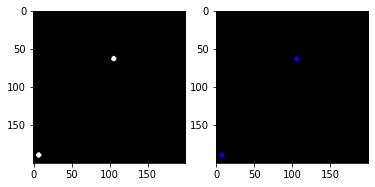

No. of dots: 2


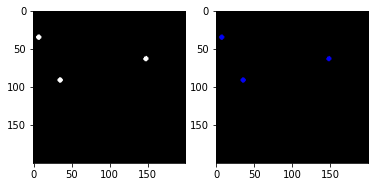

No. of dots: 3


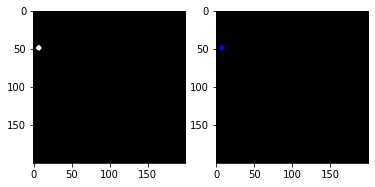

No. of dots: 1


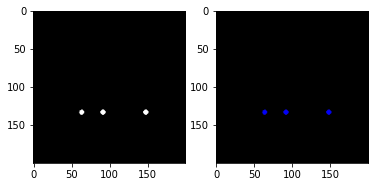

No. of dots: 3


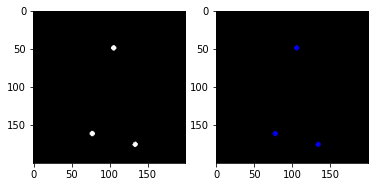

No. of dots: 3


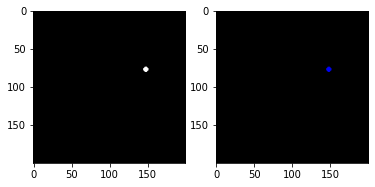

No. of dots: 1


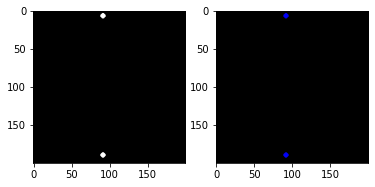

No. of dots: 2


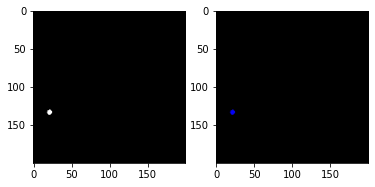

No. of dots: 1


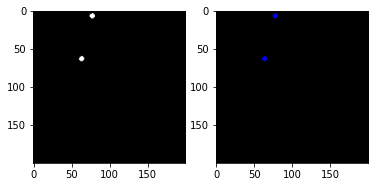

No. of dots: 2


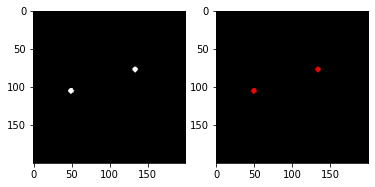

No. of dots: 2


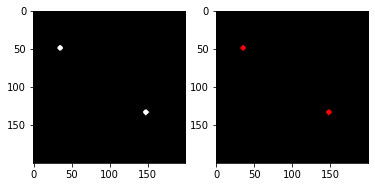

No. of dots: 2


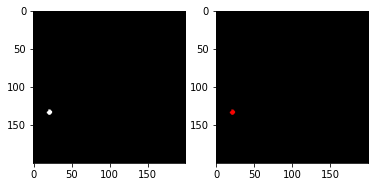

No. of dots: 1


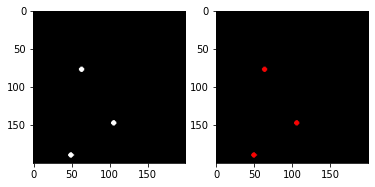

No. of dots: 3


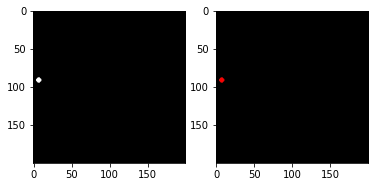

No. of dots: 1


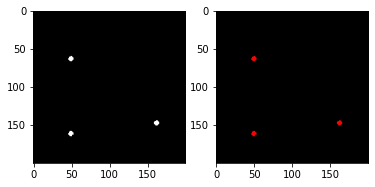

No. of dots: 3


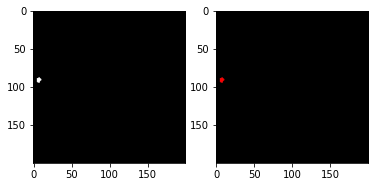

No. of dots: 1


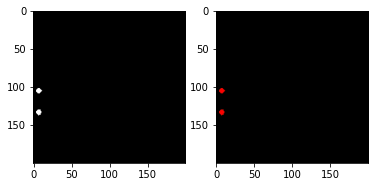

No. of dots: 2


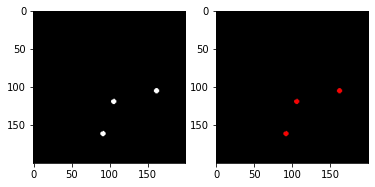

No. of dots: 3
[2, 3, 1, 3, 3, 1, 2, 1, 2] [2, 2, 1, 3, 1, 3, 1, 2, 3]


In [5]:
# Set thresholds for each color (blue, red)
light_blue = (0,0,200)
dark_blue = (20,20,255)
light_red = (200,0,0)
dark_red = (255,20,20)

def get_counts(images, lower_bound, higher_bound):
  dot_counts = []

  for image in images:
    # Create mask (extract pixels within range)
    mask = cv2.inRange(image, lower_bound, higher_bound)
    # Apply mask to image to extract original color (and: present in mask)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Check results
    plt.subplot(1, 2, 1)
    plt.imshow(mask, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(result)
    plt.show()

    # Detect edges of dots (return an image of outlines of dots)
    edges = detect_edges(result)
    dot_count = detect_dots(edges)

    dot_counts.append(dot_count)

  return dot_counts

def detect_edges(image):
  edges = cv2.Canny(image, 50, 200)
  return edges

def detect_dots(image):
  contoured_image = image.copy()
  contours, hierarchy = cv2.findContours(contoured_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  print(f'No. of dots: {len(contours)}')
  return len(contours)

blue_counts = get_counts(images, light_blue, dark_blue)
red_counts = get_counts(images, light_red, dark_red)

print(blue_counts, red_counts)

## Plot Images According to Dot Count

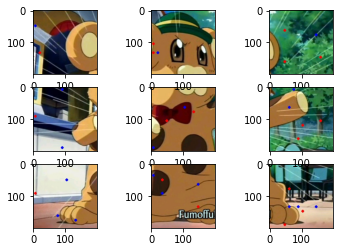

In [6]:
for i in range(len(images)):
  row = blue_counts[i]
  column = red_counts[i]
  side_count = math.sqrt(len(images))

  plt.subplot(side_count, side_count, ((row - 1) * 3 + column))
  plt.imshow(images[i])

plt.show()
